In [334]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [335]:
#crea nuevo parametros
volumen = 0.8
sesgo = 0.2

#crea datos
inicio = 0
final = 1
step = 0.025
X = torch.arange(inicio, final, step).unsqueeze(dim=1)
print(f"shape de X: {X.shape}")
y = volumen * X + sesgo
print(f"shape de y: {y.shape}")

X[:10], y[:10]

shape de X: torch.Size([40, 1])
shape de y: torch.Size([40, 1])


(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

In [336]:
#crea la division

train_division = int(0.7 * len(X)) #70% de los datos utilizados para conjunto de entrenamientoß
X_ent, y_ent = X[:train_division], y[:train_division]
X_prueba, y_prueba = X[train_division:], y[train_division:]

In [337]:
len(X_ent), len(X_prueba)

(28, 12)

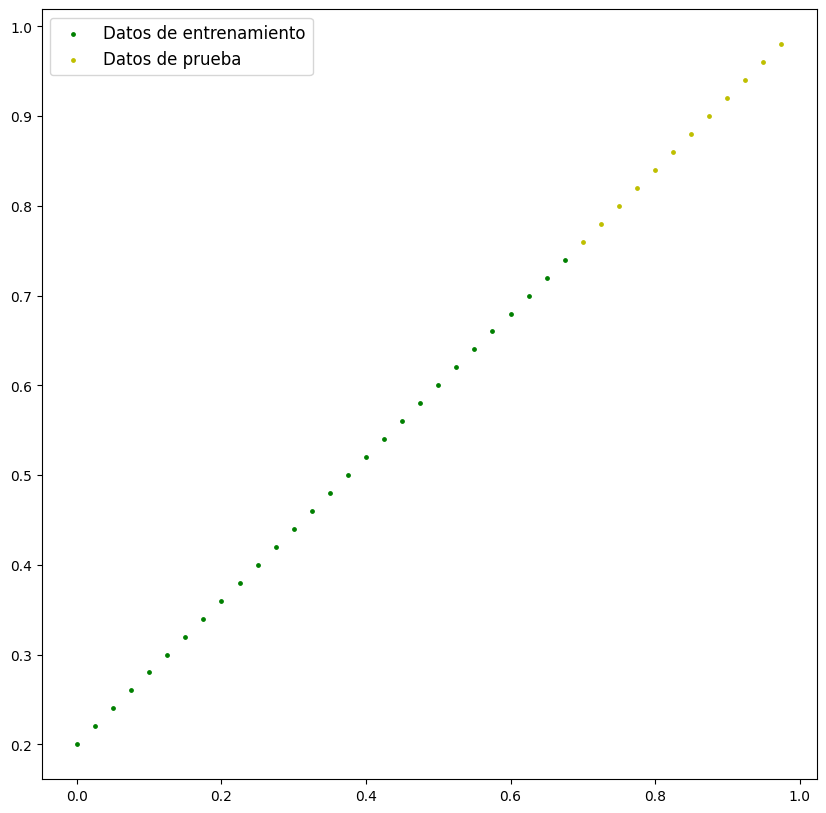

In [338]:
def plot_predictions(datos_ent=X_ent,
                    etiq_ent=y_ent,
                    datos_prueba=X_prueba,
                    etiq_prueba=y_prueba,
                    predictions=None):


# Traza datos de entrenamiento, datos de prueba y comparacompara predicciones

    plt.figure(figsize=(10, 10))

#traza datos de entrenamiento en verde
    plt.scatter(datos_ent, etiq_ent, c='g', s=6, label="Datos de entrenamiento")

# Traza datos de prueba en amarillo
    plt.scatter(datos_prueba, etiq_prueba, c="y", s=6, label="Datos de prueba")

    if predictions is not None:
    #traza las predicciones en rojo
        plt.scatter(datos_prueba, predictions, c="r", s=6, label="Predictions")

# Leyenda
    plt.legend(prop={"size": 12});

plot_predictions();

In [339]:
# Creo una clase de modelo de regresion lineal
class ModeloRegresion(nn.Module):
    def __init__(self):
        super().__init__()
        self.volumen = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))
        self.sesgo = nn.Parameter(torch.rand(1, dtype=torch.float, requires_grad=True))

    def forward(self, x):
        # Ecuación lineal: y = w * x + b
        return self.volumen * x + self.sesgo

In [340]:
#defino un seed de 42 numeros aleatorios
torch.manual_seed(42)
#creo un objeto instanciando la clase ModeloRegresionLineal
modelo1 = ModeloRegresion()

In [341]:
modelo1

ModeloRegresion()

In [342]:
modelo1.state_dict()

OrderedDict([('volumen', tensor([0.8823])), ('sesgo', tensor([0.9150]))])

In [343]:
modelo1 = ModeloRegresion()
print(modelo1.state_dict())

OrderedDict([('volumen', tensor([0.3829])), ('sesgo', tensor([0.9593]))])


In [344]:
# hago una prediccion con el modelo
with torch.inference_mode():
    y_predc = modelo1(X_prueba)

In [345]:
y_predc

tensor([[1.2273],
        [1.2369],
        [1.2465],
        [1.2560],
        [1.2656],
        [1.2752],
        [1.2847],
        [1.2943],
        [1.3039],
        [1.3135],
        [1.3230],
        [1.3326]])

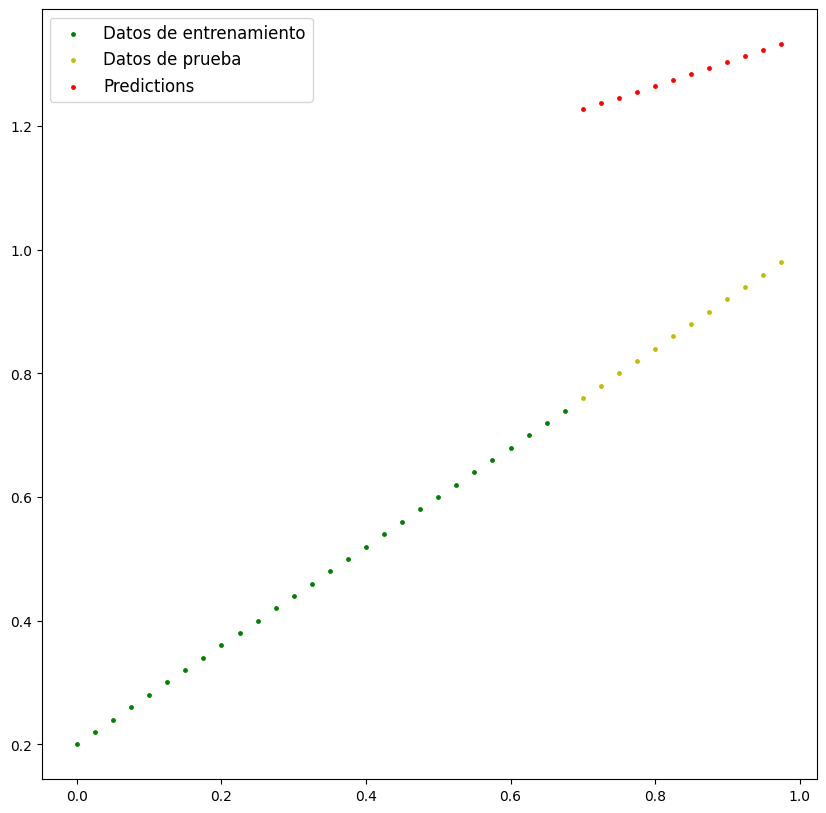

In [346]:
plot_predictions(predictions=y_predc)

In [347]:
import torch.nn as nn

# Definir la función de pérdida
fn_perdida = nn.L1Loss()

import torch.optim as optim

# Definir el optimizador
optimizador = optim.SGD(modelo1.parameters(), lr=0.01) #tasa de aprendizaje

optimizador

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [348]:
y_pred = modelo1(X_ent)
perdida = fn_perdida(y_pred, y_ent)

In [349]:
torch.manual_seed(42)
#establecemos cuantas veces el modelo pasara por los datos de entrenamiento
epocas = 100
#Creo listas vacias para realizar un seguimiento de nuestro model
entrenamiento_loss = []
test_loss = []
for epoca in range(epocas):
    ### enterenamiento
    #pongo el modelo en modo entrenamiento
    modelo1.train()
    # 1. pase hacia adelante los datos usando el metodo forward
    y_predc = modelo1(X_ent)
    # 2. calcula la perdidad (cuan diferentes son las predicciones de nuestros modelos)
    perdida = fn_perdida(y_predc, y_ent)


In [350]:
optimizador.zero_grad() # 3. Reseteo de gradientes: Es crucial reiniciar los gradientes para obtener nuevos valores limpios en cada iteración.

In [351]:
perdida.backward() #4. Retropropagación: Calculamos los gradientes de la función de pérdida respecto a los parámetros.

In [352]:
optimizador.step() # 5. Actualización de parámetros: Aplicamos la tasa de aprendizaje para ajustar los parámetros.

In [353]:
modelo1.eval()

ModeloRegresion()

In [354]:
with torch.no_grad():  # Desactiva el cálculo de gradientes
    modelo1.eval()
    y_pred_prueba = modelo1(X_prueba)
    perdida_prueba = fn_perdida(y_pred_prueba, y_prueba.float())

    

In [357]:

torch.manual_seed(42)

# Establezca cuántas veces el modelo pasará por los datos de entrenamiento
epocas = 300

# Cree listas de vacías para realizar un seguimiento de nuestro modelo
entrenamiento_loss = []
test_loss = []

for epoca in range(epocas):
    ### Entrenamiento

    # Pon el modelo en modo entrenamiento
    modelo1.train()
    
    # 1. Pase hacia adelante los datos usando el método forward() 
    y_predc = modelo1(X_ent)

    # 2. Calcula la pérdida (Cuán diferentes son las predicciones de nuestros modelos)
    perdida = fn_perdida(y_predc, y_ent)

    # 3. Reiniciar gradientes antes de calcular los nuevos
    optimizador.zero_grad()

    # 4. Pérdida al revés
    perdida.backward()

    # 5. Progreso del optimizador
    optimizador.step()

    ### Función de prueba

    # Pon el modelo en modo evaluación
    modelo1.eval()

    with torch.inference_mode():
    
      # 1. Reenviar datos de prueba
      prueba_predc = modelo1(X_prueba)

      # 2. Calcular la pérdida en datos de prueba
      prueb_perd = fn_perdida(prueba_predc, y_prueba.type(torch.float))

      # Imprime lo que está pasando
      if epoca % 10 == 0:
        entrenamiento_loss.append(perdida.detach().numpy())
        test_loss.append(prueb_perd.detach().numpy())
        print(f"Epoca: {epoca} | Entrenamiento pérdida: {perdida} | Test pérdida {prueb_perd}")


Epoca: 0 | Entrenamiento pérdida: 0.09095053374767303 | Test pérdida 0.2404634952545166
Epoca: 10 | Entrenamiento pérdida: 0.08819031715393066 | Test pérdida 0.23504363000392914
Epoca: 20 | Entrenamiento pérdida: 0.08543010801076889 | Test pérdida 0.2296237349510193
Epoca: 30 | Entrenamiento pérdida: 0.08266989141702652 | Test pérdida 0.22420386970043182
Epoca: 40 | Entrenamiento pérdida: 0.07990968972444534 | Test pérdida 0.21878401935100555
Epoca: 50 | Entrenamiento pérdida: 0.07714947313070297 | Test pérdida 0.21336416900157928
Epoca: 60 | Entrenamiento pérdida: 0.07441631704568863 | Test pérdida 0.20609700679779053
Epoca: 70 | Entrenamiento pérdida: 0.07168315351009369 | Test pérdida 0.19882988929748535
Epoca: 80 | Entrenamiento pérdida: 0.06895176321268082 | Test pérdida 0.19063913822174072
Epoca: 90 | Entrenamiento pérdida: 0.06623033434152603 | Test pérdida 0.18337200582027435
Epoca: 100 | Entrenamiento pérdida: 0.06349717080593109 | Test pérdida 0.1761048585176468
Epoca: 110 | 

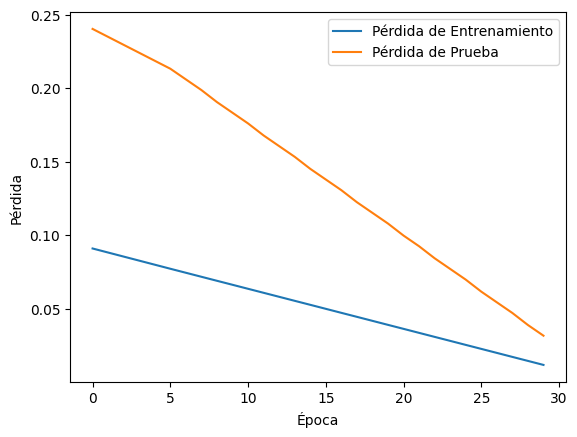

In [358]:
import matplotlib.pyplot as plt

plt.plot(entrenamiento_loss, label='Pérdida de Entrenamiento')
plt.plot(test_loss, label='Pérdida de Prueba')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()